# **Customer Data Analysis for Wolt-like Service**

# **Overview of the Project**

This project focuses on analyzing customer data from a Wolt-like delivery service. The dataset includes customer registration details, purchase history, and payment method status. The primary goal is to gain insights into customer behavior through exploratory data analysis (EDA), business metric evaluation, customer segmentation, and predictive modeling.


First, the dataset is cleaned and preprocessed to handle missing values and format inconsistencies. Then, EDA is performed to explore trends such as registration growth, purchase behavior, and user activity. Key business metrics like conversion rate, retention rate, and average order value are computed to assess overall performance.


A machine learning model (Random Forest Classifier) is implemented to predict whether a customer has a valid payment method. Additionally, K-Means clustering is used to segment customers based on their purchase patterns. This project provides actionable insights that businesses can use to enhance marketing strategies and user retention.

## **Problem of the Project**

Online delivery services face challenges like **low customer retention, inactive users, and predicting payment method adoption.** Many registered users never make purchases, making it crucial to identify engagement patterns. Predicting valid payment methods helps businesses target users effectively. **Customer segmentation** is also vital for personalized marketing, as a generic approach reduces effectiveness. This project uses **data-driven techniques**to optimize decision-making, improve customer retention, and enhance business performance.

## **Objectives of the Project**

1.**Perform Exploratory Data Analysis (EDA):**

  To identify trends in customer registration, purchase activity, and user engagement.

2.**Evaluate Key Business Metrics:**

  To compute conversion rate, retention rate, and purchase frequency to assess business performance.

3.**Build a Predictive Model for Payment Method Adoption:**

  To use machine learning to predict whether a user has a valid payment method.

4.**Segment Customers for Targeted Marketing:**

  To apply clustering techniques (K-Means) to categorize customers based on spending patterns.

# **Importing Necessary Libraries**

Here I will import all libraries that will help to perform data analysis, visualization, and machine learning.

*   **pandas:** It handles structured data efficiently, allowing for easy manipulation.
*   **json:** It helps process JSON-like data.

*   **matplotlib.pyplot & seaborn:** It Provide powerful visualization tools.
*   **sklearn.model_selection.train_test_split:** It Splits the dataset into training and test sets.


*   **sklearn.ensemble.RandomForestClassifier**: A classification model used to predict customer behavior.


*   **sklearn.metrics.accuracy_score, classification_report:** It Evaluate model performance.

*   **sklearn.cluster.KMeans:** A clustering algorithm used for customer segmentation.
*   **sklearn.preprocessing.StandardScaler:** It Normalizes data before clustering.


In [39]:
# IMPORTING ALL LIBRARIES NEEDED
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Step 1: Data Preprocessing

In [38]:


# Load dataset
file_path = "dataset_for_datascience_assignment.csv"  # Adjust this if needed
df = pd.read_csv(file_path)

# Convert date columns to datetime format
date_cols = ["REGISTRATION_DATE", "FIRST_PURCHASE_DAY", "LAST_PURCHASE_DAY"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Parse JSON-like column PURCHASE_COUNT_BY_STORE_TYPE
def parse_json_column(json_str):
    try:
        return json.loads(json_str.replace("\n", "").replace("  ", ""))
    except (json.JSONDecodeError, AttributeError):
        return None

df["PURCHASE_COUNT_BY_STORE_TYPE"] = df["PURCHASE_COUNT_BY_STORE_TYPE"].apply(parse_json_column)

# Fill missing numerical values with 0
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(0)

# Fill missing categorical values with "Unknown"
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")


# **Loading the dataset**



*   Reads the CSV file and loads it into a pandas DataFrame.


*   The DataFrame allows easy exploration, cleaning, and manipulation.


  This step is crucial as it forms the foundation for further analysis. If the file path is incorrect or the data is improperly formatted, the analysis will fail.


### **Handling Date Columns**

*   Ensures that date-related columns are in the correct format for time-based analysis.

*   **errors='coerce**' ensures that any invalid values are converted to NaT (not a time), preventing crashes.


 Date conversions are essential for time-based analysis, such as customer retention and trend analysis.



# **Parsing JSON Data**

*   Some columns store structured **purchase data as JSON strings.**

*   This function **parses the JSON string into a Python dictionary,** making it easier to extract insights.


 This ensures the data is in a structured format for easier analysis of purchase distribution across store types.

# **Handling Missing Values**

* **Missing values can cause issues** in analysis and modeling.

*  **Numerical values** are set to **0** so that calculations don’t break.

*  **Categorical values** are replaced with **"Unknown"** to prevent errors in classification models.


Missing data can lead to errors or misinterpretations in analysis. Filling missing values ensures data completeness

In [40]:
# Display the first few rows of the dataset
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01,DNK,0,0.0,0.0,NaT,NaT,1,0.0,0.0,...,0.0,0.0,Unknown,False,0.0,0.0,0.0,0.0,0.000,"{'General merchandise': 0, 'Grocery': 0, 'Pet ..."
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,...,0.0,1.0,Unknown,False,23.0,2.0,0.0,0.0,6.853,"{'General merchandise': 0, 'Grocery': 0, 'Pet ..."
2,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0.0,4.0,...,19.0,0.0,Unknown,True,21.0,2.0,9.0,3.0,6.559,"{'General merchandise': 1, 'Grocery': 9, 'Pet ..."
3,2019-09-01,FIN,0,0.0,0.0,NaT,NaT,4,0.0,0.0,...,0.0,0.0,Unknown,False,0.0,0.0,0.0,0.0,0.000,"{'General merchandise': 0, 'Grocery': 0, 'Pet ..."
4,2019-09-01,GRC,0,0.0,0.0,NaT,NaT,5,0.0,0.0,...,0.0,0.0,Unknown,False,0.0,0.0,0.0,0.0,0.000,"{'General merchandise': 0, 'Grocery': 0, 'Pet ..."


In [41]:
# Display the last few rows of the dataset
df.tail()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
21978,2019-09-30,GRC,1,1.0,0.0,2020-01-23,2020-01-23,21979,0.0,0.0,...,0.0,1.0,Unknown,False,12.0,2.0,0.0,0.0,1.383,"{'General merchandise': 0, 'Grocery': 0, 'Pet ..."
21979,2019-09-30,GRC,0,0.0,0.0,NaT,NaT,21980,0.0,0.0,...,0.0,0.0,Unknown,False,0.0,0.0,0.0,0.0,0.000,"{'General merchandise': 0, 'Grocery': 0, 'Pet ..."
21980,2019-09-30,DNK,0,0.0,0.0,NaT,NaT,21981,0.0,0.0,...,0.0,0.0,Unknown,False,0.0,0.0,0.0,0.0,0.000,"{'General merchandise': 0, 'Grocery': 0, 'Pet ..."
21981,2019-09-30,DNK,0,0.0,0.0,NaT,NaT,21982,0.0,0.0,...,0.0,0.0,Unknown,False,0.0,0.0,0.0,0.0,0.000,"{'General merchandise': 0, 'Grocery': 0, 'Pet ..."
21982,2019-09-30,GRC,1,1.0,0.0,2019-10-01,2019-10-01,21983,0.0,1.0,...,1.0,0.0,Unknown,True,1.0,5.0,0.0,0.0,3.973,"{'General merchandise': 0, 'Grocery': 0, 'Pet ..."


In [42]:
# Display the information of the Dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REGISTRATION_DATE                        21983 non-null  datetime64[ns]
 1   REGISTRATION_COUNTRY                     21983 non-null  object        
 2   PURCHASE_COUNT                           21983 non-null  int64         
 3   PURCHASE_COUNT_DELIVERY                  21983 non-null  float64       
 4   PURCHASE_COUNT_TAKEAWAY                  21983 non-null  float64       
 5   FIRST_PURCHASE_DAY                       11964 non-null  datetime64[ns]
 6   LAST_PURCHASE_DAY                        12027 non-null  datetime64[ns]
 7   USER_ID                                  21983 non-null  int64         
 8   BREAKFAST_PURCHASES                      21983 non-null  float64       
 9   LUNCH_PURCHASES                        

In [43]:
# Give the Dscription of the dataset
df.describe()

,REGISTRATION_DATE,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
count,21983,21983.000000,21983.000000,21983.000000,11964,12027,21983.00000,21983.000000,21983.000000,21983.000000,...,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000
mean,2019-09-15 11:16:32.239457536,3.345358,3.141564,0.203794,2019-11-22 22:09:08.846539520,2020-04-18 23:06:28.825143296,10992.00000,0.106127,1.299504,0.269981,...,23.017532,17.068379,1.586999,0.578083,1.180276,6.293318,2.194286,22.906200,19.877360,3.261681
min,2019-09-01 00:00:00,0.000000,0.000000,0.000000,2019-09-01 00:00:00,2019-09-01 00:00:00,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-09-08 00:00:00,0.000000,0.000000,0.000000,2019-09-14 00:00:00,2019-10-11 00:00:00,5496.50000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-09-15 00:00:00,1.000000,1.000000,0.000000,2019-09-26 00:00:00,2020-05-22 00:00:00,10992.00000,0.000000,0.000000,0.000000,...,14.224000,12.144000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.023000
75%,2019-09-22 00:00:00,3.000000,3.000000,0.000000,2019-12-30 00:00:00,2020-09-27 00:00:00,16487.50000,0.000000,1.000000,0.000000,...,37.592000,29.348000,1.000000,0.000000,0.000000,13.000000,4.000000,21.000000,12.000000,6.461500
max,2019-09-30 00:00:00,320.000000,320.000000,44.000000,2020-10-31 00:00:00,2020-10-31 00:00:00,21983.00000,52.000000,171.000000,71.000000,...,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000
std,NaN,8.523171,8.301007,1.063899,NaN,NaN,6346.08982,0.822346,4.326257,1.374056,...,36.961648,21.816161,5.701134,3.571970,5.198396,7.685281,2.489147,53.143306,52.113803,3.921630


*   **df.head()** and **df.tail()** preview the first and last rows respectively.

*   **df.info()** provides a summary of data types and missing values.

*   **df.describe()** gives statistical insights into numerical columns.


This helps to identify anomalies, such as incorrect data types, missing values, or extreme outliers.


## Step 2: Exploratory Data Analysis (EDA)

## **Customer Registration Trends**

* Visualizes how customer registrations have varied over time.

*   It Can reveal seasonality, promotions, or external factors influencing registration.

*   Uses a line plot to show trends.


It help to identify seasonal trends, promotional campaign impacts, or business growth patterns.

## **Active vs. Inactive Users**

*  Categorizes users as **Active** (at least one purchase) or **Inactive** (no purchases).

*   This insight helps in customer engagement strategies.

*   Uses a count plot to show distribution.



This helps businesses understand retention issues and the percentage of customers who convert after registration.

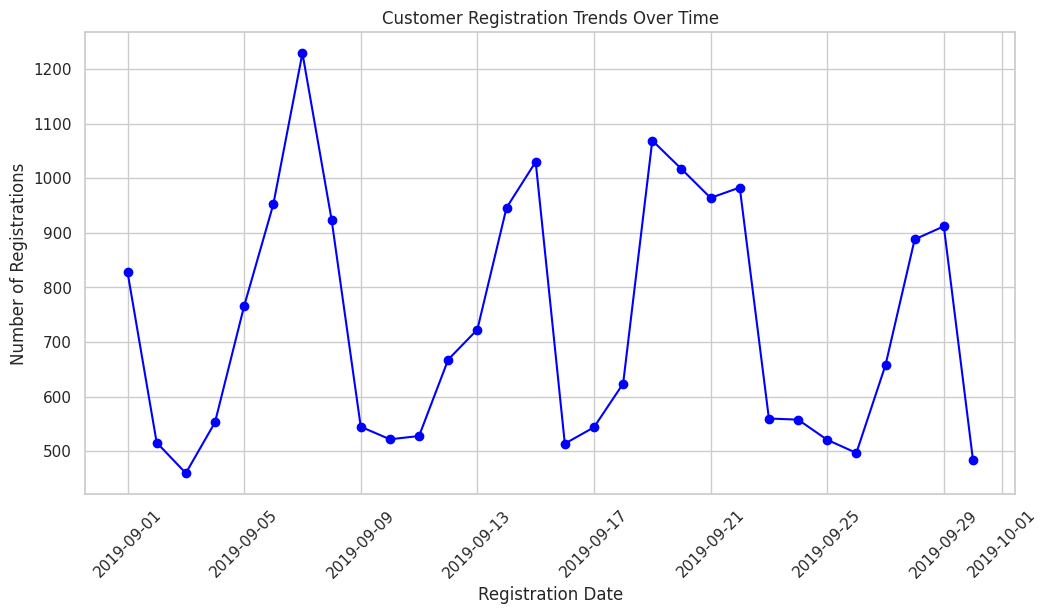

<ipython-input-46-6cd4ac0ae8eb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="USER_STATUS", palette=["red", "green"])


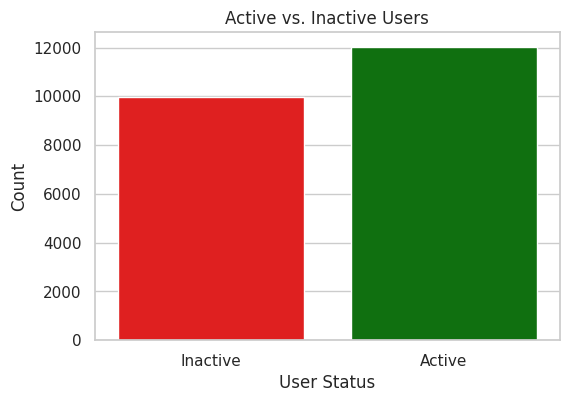

In [46]:
# Set plot style
sns.set_theme(style="whitegrid")

# Plot customer registration trends
plt.figure(figsize=(12, 6))
df["REGISTRATION_DATE"].dt.date.value_counts().sort_index().plot(kind="line", marker="o", color="blue")
plt.xlabel("Registration Date")
plt.ylabel("Number of Registrations")
plt.title("Customer Registration Trends Over Time")
plt.xticks(rotation=45)
plt.show()

# Active vs. Inactive users
df["USER_STATUS"] = df["PURCHASE_COUNT"].apply(lambda x: "Active" if x > 0 else "Inactive")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="USER_STATUS", palette=["red", "green"])
plt.title("Active vs. Inactive Users")
plt.xlabel("User Status")
plt.ylabel("Count")
plt.show()


## Step 3: Splitting of Dataset

*   It helps in predicting if a user has a valid payment method.

*   Selects features related to purchases and payment methods

*   Splitting data **(80% training, 20% testing)** prevents overfitting.


Splitting the dataset ensures the model is trained on one part and tested on another to evaluate performance.

In [47]:
# Selecting features and target variable
features = ["PURCHASE_COUNT", "TOTAL_PURCHASES_EUR", "IOS_PURCHASES", "ANDROID_PURCHASES", "WEB_PURCHASES"]
target = "USER_HAS_VALID_PAYMENT_METHOD"

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Display dataset sizes
len(X_train), len(X_test)


(17586, 4397)

## Step 4: Model Prediction

*   I am using **Random Forest Classifier** which is a robust machine learning model that improves prediction accuracy.

*   It learns patterns from historical data and **predicts whether a user has a valid payment method**.


This model can help businesses predict which users are likely to complete purchases based on historical data.


In [28]:
# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


## Step 5: Model Evaluation

*  **Accuracy Score:** Measures how well the model performed.

*  **Classification Report:** Provides detailed metrics like precision, recall, and F1-score.


A high accuracy suggests the model is **effective**.

The classification report gives precision, recall, and F1-score details.

In [30]:
# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Step 6: Key Business Metrics

*   **Conversion Rate:** % of registered users who made a purchase.

*   **Average Order Value (AOV)**: Revenue per order.

*   **Retention Rate**: % of repeat customers.

*   **Purchase Frequency:** Average orders per active user.


These metrics are critical for measuring business performance, user engagement, and revenue potential.

In [31]:

# Compute key metrics
total_users = len(df)
active_users = df[df["PURCHASE_COUNT"] > 0].shape[0]
conversion_rate = (active_users / total_users) * 100


total_revenue = df["TOTAL_PURCHASES_EUR"].sum()
total_orders = df["PURCHASE_COUNT"].sum()
average_order_value = total_revenue / total_orders if total_orders > 0 else 0

repeat_customers = df[df["PURCHASE_COUNT"] > 1].shape[0]
retention_rate = (repeat_customers / active_users) * 100 if active_users > 0 else 0

purchase_frequency = total_orders / active_users if active_users > 0 else 0

# Display results
conversion_rate, average_order_value, retention_rate, purchase_frequency


(54.715007050902976,
 np.float64(28.82009931874736),
 65.25606917193217,
 np.float64(6.114150315929498))

## Step 7: Correlation Analysis

*   It identifies relationships between numrical variables.

*   It helps determine key drivers of purchase behavior.


 This helps identify which features are highly correlated, aiding in feature selection for modeling.

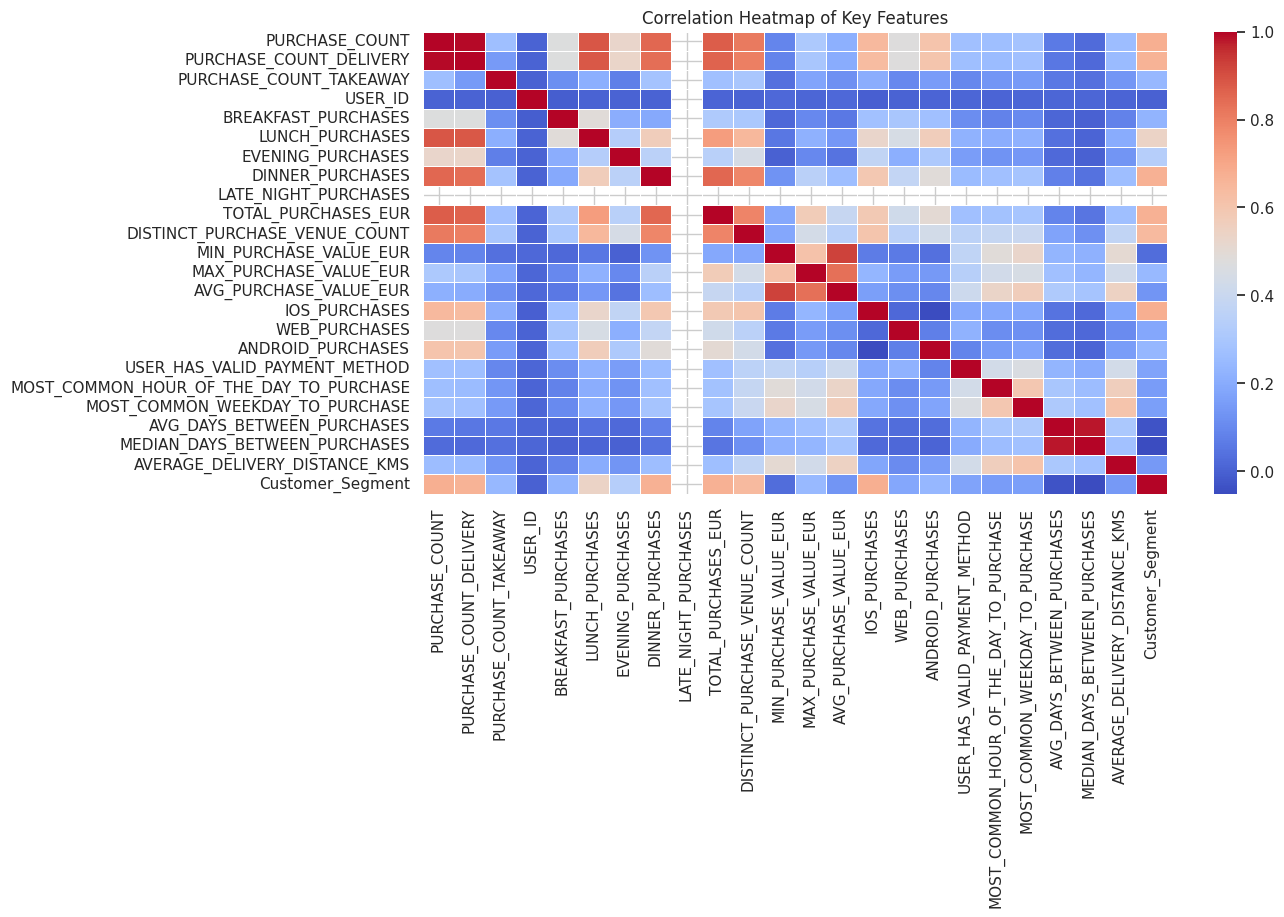

In [34]:

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Key Features")
plt.show()


## Step 8: Customer Segmentation

*   Uses K-means Clustering to **Group customers into clusters** based on purchasing behavior.

*   It helps businesses **target promotions and engagement efforts effectively.**



It identifies customer groups based on spending behavior, helping tailor marketing strategies.

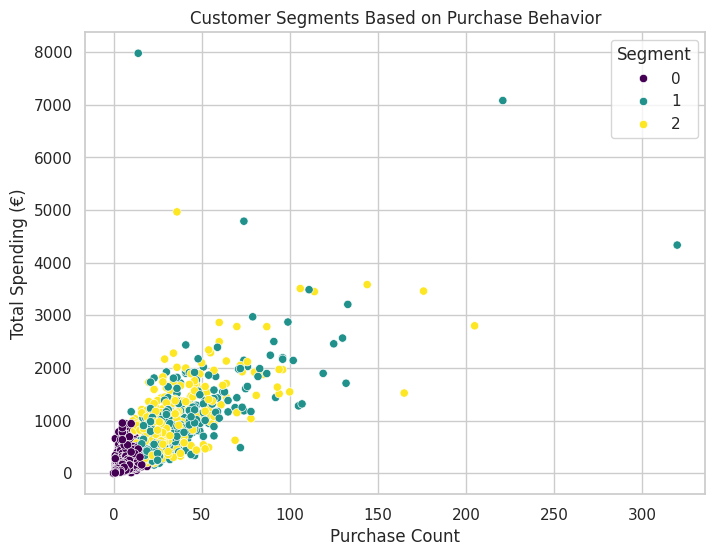

,count
Customer_Segment,
0,20797
2,641
1,545


In [35]:
# Select features for clustering
segmentation_features = ["PURCHASE_COUNT", "TOTAL_PURCHASES_EUR", "IOS_PURCHASES", "ANDROID_PURCHASES", "WEB_PURCHASES"]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[segmentation_features])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Customer_Segment"] = kmeans.fit_predict(df_scaled)

# Visualizing customer segments
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PURCHASE_COUNT", y="TOTAL_PURCHASES_EUR", hue="Customer_Segment", palette="viridis")
plt.xlabel("Purchase Count")
plt.ylabel("Total Spending (€)")
plt.title("Customer Segments Based on Purchase Behavior")
plt.legend(title="Segment")
plt.show()

# Segment distribution
df["Customer_Segment"].value_counts()


### **Summary**


1. **EDA reveals key trends**, such as registration spikes and active user distribution.

2. **Machine learning predicts valid payment methods,** helping optimize business strategies.

3. **Key metrics like conversion rate and retention rate** provide insights into customer behavior.

4. **Customer segmentation identifies different user types,** aiding in personalized marketing.